In [1]:
import numpy as np
measurements = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119,
                         157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146,
                         203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110,
                         216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [2]:
measurements[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [3]:
import scipy.stats as stats

In [4]:
stats.describe(measurements)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [5]:
# Conjectures
# Normality conjecture

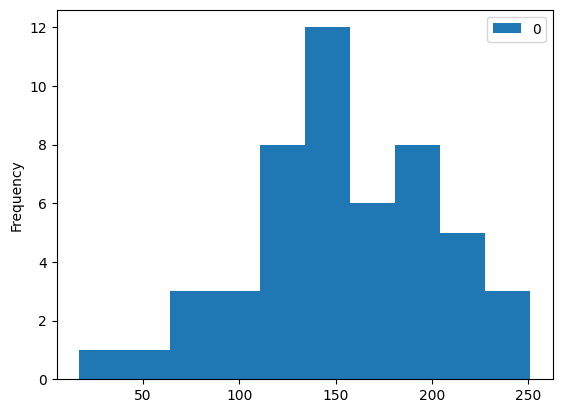

In [9]:
# Histogram
import pandas as pd
pd.DataFrame(measurements).plot.hist();

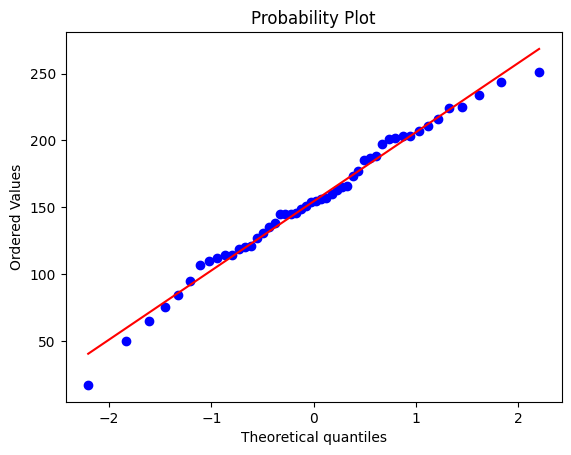

In [10]:
# Qqplot
import pylab
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [11]:
# Shapiro-Wilks Test

H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur

H1: Fark vardır

In [17]:
from scipy.stats import shapiro

In [18]:
shapiro(measurements)

ShapiroResult(statistic=0.9853101372718811, pvalue=0.7848551869392395)

In [19]:
stats.ttest_1samp(measurements, popmean= 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

H0: Web sitemizde geçirilen ortalama süre 170'tir

H1: Web sitemizde geçirilen ortalama süre 170 değildir

In [20]:
from statsmodels.stats.descriptivestats import sign_test

In [21]:
sign_test(measurements, 170)

(-7.0, 0.06490864707227217)

In [23]:
from statsmodels.stats.proportion import proportions_ztest

H0: p = 0.125

H1: p != 0.125

In [26]:
count = 40
nobs = 500
value = 0.125

In [27]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

### Korelasyon Analizi

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


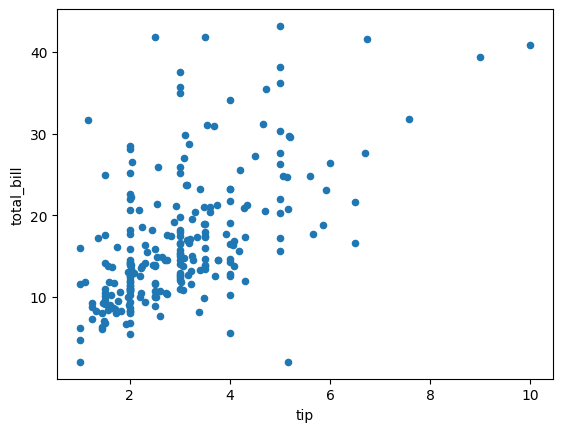

In [6]:
df.plot.scatter("tip", "total_bill");

In [7]:
df["tip"].corr(df["total_bill"])

0.5766634471096378

In [9]:
df["tip"].corr(df["total_bill"], method="spearman")

0.593691939408997

In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from scipy.stats import stats
stats.spearmanr(df['tip'], df['total_bill'])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)